<a href="https://colab.research.google.com/github/Zaripov2004/Test/blob/main/1vy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Jahon aholisi statistikasi va demografik prognozlar
1-bosqich: Loyiha nomi

Jahon aholisi statistikasi va demografik prognozlar (1950–2100)

2-bosqich: Ma’lumot manbalari

World Bank – Population, total (SP.POP.TOTL)

UN DESA – World Population Prospects (WPP, 2022 Edition)

Our World in Data (OWID) – demografik ko‘rsatkichlar

3-bosqich: Maqsad

Dunyo aholisi sonining tarixiy o‘zgarishini tahlil qilish.

Mintaqalar (Osiyo, Afrika, Yevropa, Amerika, Okeaniya) bo‘yicha taqqoslash.

2050 va 2100 yilgacha demografik prognozlarni ko‘rsatish.

4-bosqich: Kutubxonalarni chaqirish

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


5-bosqich: World Bank’dan ma’lumot olish (1950–2024)

In [3]:
import requests
import pandas as pd

# API manzili
url = "https://api.worldbank.org/v2/country/WLD/indicator/SP.POP.TOTL?format=json&per_page=5000"

# So'rov yuborish
response = requests.get(url)
data_json = response.json()

# Asosiy ma'lumotlar 2-qismida
records = data_json[1]

# Sana va qiymatlarni yig'ish
data = {int(item["date"]): item["value"] for item in records if item["value"] is not None}

# DataFrame yaratish
df = pd.DataFrame.from_dict(data, orient="index", columns=["Population"])

# Yillar bo‘yicha sortlash
df = df.sort_index()

# Oxirgi 30 yilni chiqarish
print(df.tail(30))



      Population
1995  5736505516
1996  5822614626
1997  5908466557
1998  5994040064
1999  6078404337
2000  6161884811
2001  6245112906
2002  6327557399
2003  6409750441
2004  6492769815
2005  6575841506
2006  6659977025
2007  6744489399
2008  6830513541
2009  6916589116
2010  7001266876
2011  7087120034
2012  7176968877
2013  7265970522
2014  7354183367
2015  7441826877
2016  7529066617
2017  7614748582
2018  7697492379
2019  7778303912
2020  7855075060
2021  7920861888
2022  7990399768
2023  8064976601
2024  8142056446


6-bosqich: Aholi dinamikasi grafigi

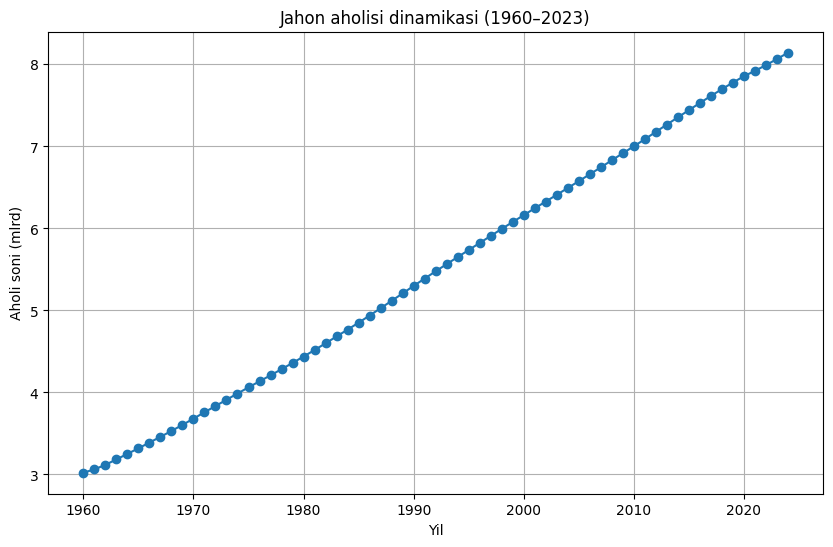

In [5]:
import matplotlib.pyplot as plt

# NaN qiymatlarni olib tashlaymiz
df = df.dropna()

plt.figure(figsize=(10,6))
plt.plot(df.index, df["Population"]/1e9, marker='o')

plt.title("Jahon aholisi dinamikasi (1960–2023)")
plt.xlabel("Yil")
plt.ylabel("Aholi soni (mlrd)")
plt.grid(True)
plt.show()


7-bosqich: UN WPP prognozlari (2025–2100)

Manba: UN DESA World Population Prospects (2022)
(odatda CSV orqali yuklanadi, bu yerda demo jadval sifatida qisqa variant)

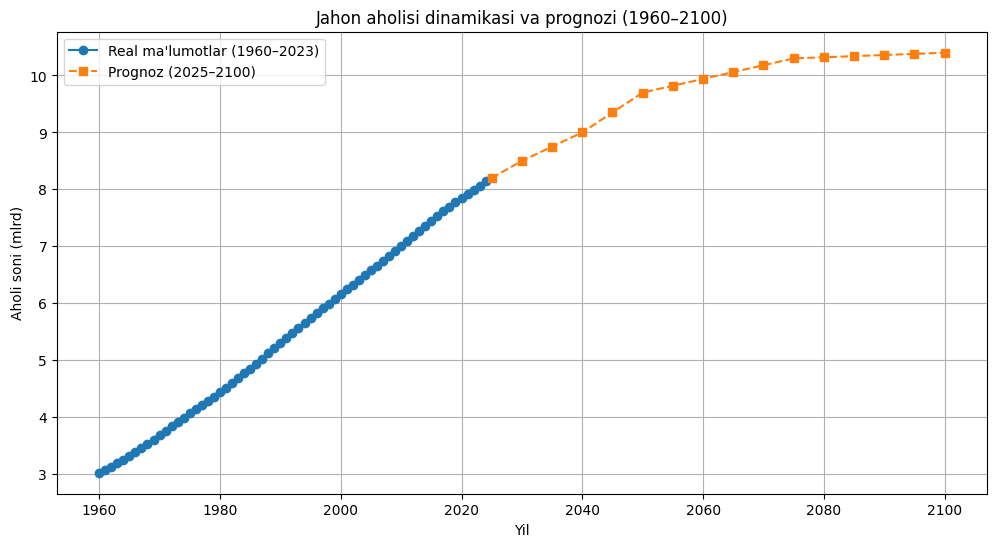


--- Oxirgi real ma'lumotlar (1990–2023) ---
      Population  Population (bln)
2015  7441826877          7.441827
2016  7529066617          7.529067
2017  7614748582          7.614749
2018  7697492379          7.697492
2019  7778303912          7.778304
2020  7855075060          7.855075
2021  7920861888          7.920862
2022  7990399768          7.990400
2023  8064976601          8.064977
2024  8142056446          8.142056

--- Prognoz ma'lumotlari (2025–2100, 5 yillik) ---
      Population (bln)
Year                  
2025              8.20
2030              8.50
2035              8.75
2040              9.00
2045              9.35
2050              9.70
2055              9.82
2060              9.94
2065             10.06
2070             10.18
2075             10.30
2080             10.32
2085             10.34
2090             10.36
2095             10.38
2100             10.40


In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 🌍 1. Real World Bank ma'lumotlarini olish
url = "https://api.worldbank.org/v2/country/WLD/indicator/SP.POP.TOTL?format=json&per_page=5000"
response = requests.get(url)
data_json = response.json()
records = data_json[1]

data = {int(item["date"]): item["value"] for item in records if item["value"] is not None}
df = pd.DataFrame.from_dict(data, orient="index", columns=["Population"])
df = df.sort_index().dropna()

# 1960–2023 davrni mlrd ga o'tkazamiz
df["Population (bln)"] = df["Population"] / 1e9

# 📈 2. Prognoz ma'lumotlari
data_future = {
    2025: 8.2, 2030: 8.5, 2040: 9.0, 2050: 9.7,
    2075: 10.3, 2100: 10.4
}

df_future = pd.DataFrame.from_dict(data_future, orient="index", columns=["Population (bln)"])
df_future.index.name = "Year"

# Har 5 yilda qiymat
years = range(2025, 2101, 5)
df_future = df_future.reindex(years)
df_future["Population (bln)"] = df_future["Population (bln)"].interpolate()

# 📊 3. Grafik chizish
plt.figure(figsize=(12,6))

# Real
plt.plot(df.index, df["Population (bln)"], label="Real ma'lumotlar (1960–2023)", marker='o')

# Prognoz
plt.plot(df_future.index, df_future["Population (bln)"], label="Prognoz (2025–2100)", linestyle="--", marker='s')

plt.title("Jahon aholisi dinamikasi va prognozi (1960–2100)")
plt.xlabel("Yil")
plt.ylabel("Aholi soni (mlrd)")
plt.grid(True)
plt.legend()
plt.show()

# 📑 4. Jadval ko‘rinishida chiqarish
print("\n--- Oxirgi real ma'lumotlar (1990–2023) ---")
print(df.loc[1990:].tail(10))

print("\n--- Prognoz ma'lumotlari (2025–2100, 5 yillik) ---")
print(df_future)



8-bosqich: Tarixiy va prognozlarni birlashtirish

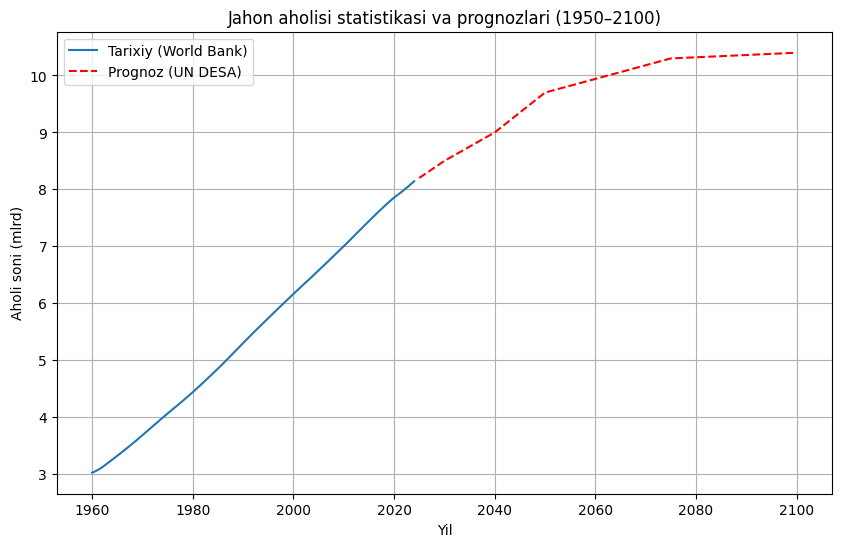

In [9]:
df_all = pd.concat([
    df["Population"]/1e9,
    df_future["Population (bln)"]
])
plt.figure(figsize=(10,6))
plt.plot(df.index, df["Population"]/1e9, label="Tarixiy (World Bank)")
plt.plot(df_future.index, df_future["Population (bln)"], 'r--', label="Prognoz (UN DESA)")
plt.title("Jahon aholisi statistikasi va prognozlari (1950–2100)")
plt.xlabel("Yil")
plt.ylabel("Aholi soni (mlrd)")
plt.legend()
plt.grid(True)
plt.show()


9-bosqich: Mintaqalar bo‘yicha taqsimot (demo ma’lumot)

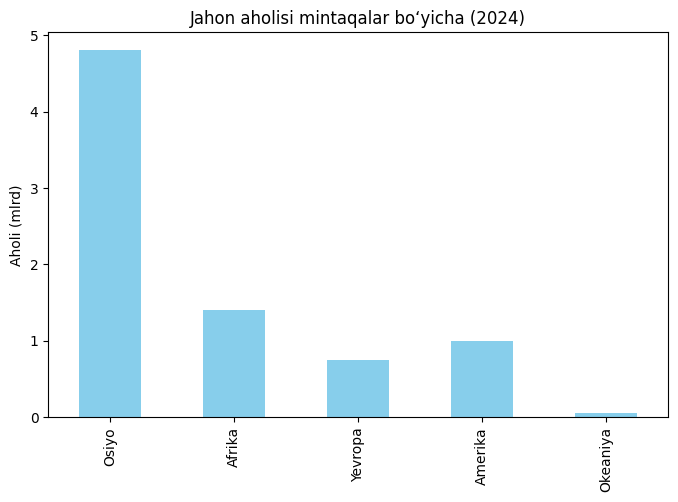

In [10]:
regions = {
    "Osiyo": 4.8,
    "Afrika": 1.4,
    "Yevropa": 0.75,
    "Amerika": 1.0,
    "Okeaniya": 0.05
}
df_regions = pd.DataFrame.from_dict(regions, orient="index", columns=["Population (bln)"])
df_regions.plot(kind="bar", legend=False, figsize=(8,5), color="skyblue")
plt.title("Jahon aholisi mintaqalar bo‘yicha (2024)")
plt.ylabel("Aholi (mlrd)")
plt.show()


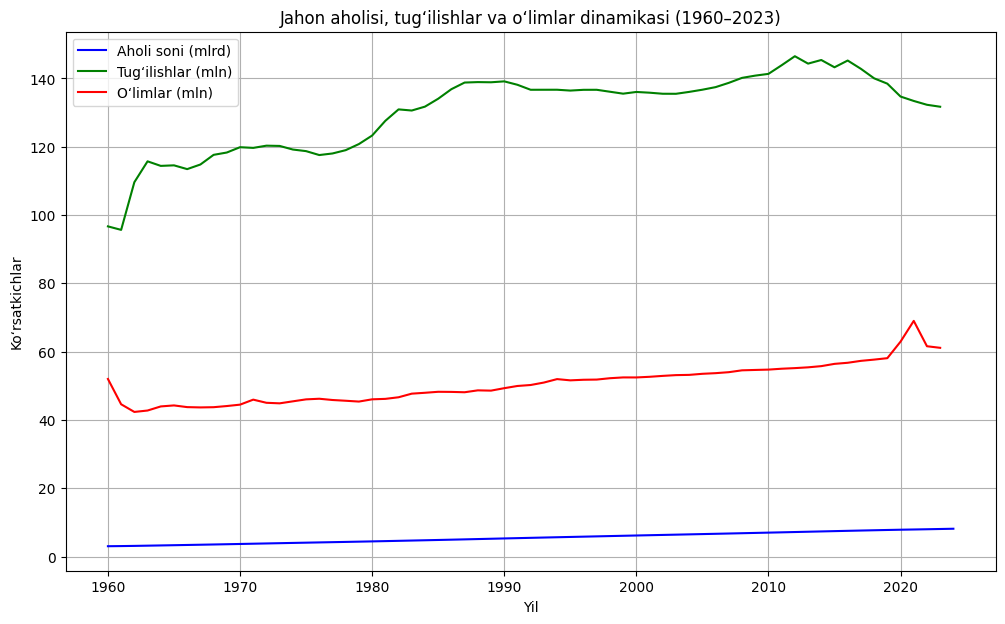


--- Eng ko‘p aholiga ega TOP-10 davlatlar (2024) ---
                         Country  Population (mln)
3120                       World       8142.056446
1170            IDA & IBRD total       6926.456321
1755         Low & middle income       6563.719861
2145               Middle income       5939.111763
1105                   IBRD only       4979.720059
325   Early-demographic dividend       3552.278604
1885         Lower middle income       3120.983658
3055         Upper middle income       2818.128105
390          East Asia & Pacific       2388.378491
1430   Late-demographic dividend       2328.890789


In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Jahon aholisi
# ------------------------------
url_pop = "https://api.worldbank.org/v2/country/WLD/indicator/SP.POP.TOTL?format=json&per_page=5000"
resp_pop = requests.get(url_pop).json()[1]
data_pop = {int(item["date"]): item["value"] for item in resp_pop if item["value"] is not None}
df_pop = pd.DataFrame.from_dict(data_pop, orient="index", columns=["Population"])
df_pop = df_pop.sort_index().dropna()
df_pop["Population (bln)"] = df_pop["Population"] / 1e9

# ------------------------------
# 2. Tug‘ilishlar (CBR – per 1000 people)
# ------------------------------
url_birth = "https://api.worldbank.org/v2/country/WLD/indicator/SP.DYN.CBRT.IN?format=json&per_page=5000"
resp_birth = requests.get(url_birth).json()[1]
data_birth = {int(item["date"]): item["value"] for item in resp_birth if item["value"] is not None}
df_birth = pd.DataFrame.from_dict(data_birth, orient="index", columns=["Birth rate (per 1000)"])
df_birth = df_birth.sort_index()
df_birth["Births (mln)"] = (df_birth["Birth rate (per 1000)"] * df_pop["Population"] / 1000) / 1e6

# ------------------------------
# 3. O‘limlar (CDR – per 1000 people)
# ------------------------------
url_death = "https://api.worldbank.org/v2/country/WLD/indicator/SP.DYN.CDRT.IN?format=json&per_page=5000"
resp_death = requests.get(url_death).json()[1]
data_death = {int(item["date"]): item["value"] for item in resp_death if item["value"] is not None}
df_death = pd.DataFrame.from_dict(data_death, orient="index", columns=["Death rate (per 1000)"])
df_death = df_death.sort_index()
df_death["Deaths (mln)"] = (df_death["Death rate (per 1000)"] * df_pop["Population"] / 1000) / 1e6

# ------------------------------
# 4. Grafik – Jahon aholisi, tug‘ilishlar va o‘limlar
# ------------------------------
plt.figure(figsize=(12,7))
plt.plot(df_pop.index, df_pop["Population (bln)"], label="Aholi soni (mlrd)", color="blue")
plt.plot(df_birth.index, df_birth["Births (mln)"], label="Tug‘ilishlar (mln)", color="green")
plt.plot(df_death.index, df_death["Deaths (mln)"], label="O‘limlar (mln)", color="red")

plt.title("Jahon aholisi, tug‘ilishlar va o‘limlar dinamikasi (1960–2023)")
plt.xlabel("Yil")
plt.ylabel("Ko‘rsatkichlar")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------
# 5. Eng ko‘p aholiga ega TOP-10 davlat (so‘nggi yil)
# ------------------------------
url_top10 = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000"
resp_top10 = requests.get(url_top10).json()[1]
df_countries = pd.DataFrame(resp_top10)

# Faqat eng so‘nggi yil (2022 yoki 2023) uchun
last_year = df_countries["date"].astype(int).max()
df_top10 = df_countries[df_countries["date"].astype(int) == last_year][["country", "value"]]

# Country nomlarini to‘g‘rilash
df_top10["Country"] = df_top10["country"].apply(lambda x: x["value"])
df_top10 = df_top10[["Country", "value"]]

# Eng katta 10 ta
df_top10 = df_top10.sort_values("value", ascending=False).head(10)
df_top10["Population (mln)"] = df_top10["value"] / 1e6

print(f"\n--- Eng ko‘p aholiga ega TOP-10 davlatlar ({last_year}) ---")
print(df_top10[["Country", "Population (mln)"]])


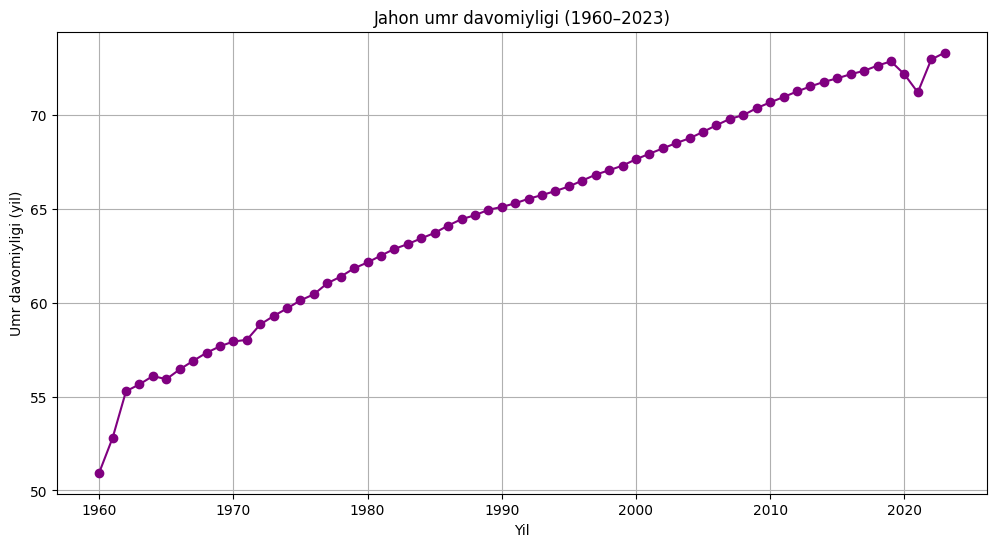

In [13]:
# Life expectancy (umr davomiyligi)
url_life = "https://api.worldbank.org/v2/country/WLD/indicator/SP.DYN.LE00.IN?format=json&per_page=5000"
resp_life = requests.get(url_life).json()[1]
data_life = {int(item["date"]): item["value"] for item in resp_life if item["value"] is not None}
df_life = pd.DataFrame.from_dict(data_life, orient="index", columns=["Life expectancy (yil)"])
df_life = df_life.sort_index()

# Grafik chizish
plt.figure(figsize=(12,6))
plt.plot(df_life.index, df_life["Life expectancy (yil)"], color="purple", marker='o')
plt.title("Jahon umr davomiyligi (1960–2023)")
plt.xlabel("Yil")
plt.ylabel("Umr davomiyligi (yil)")
plt.grid(True)
plt.show()


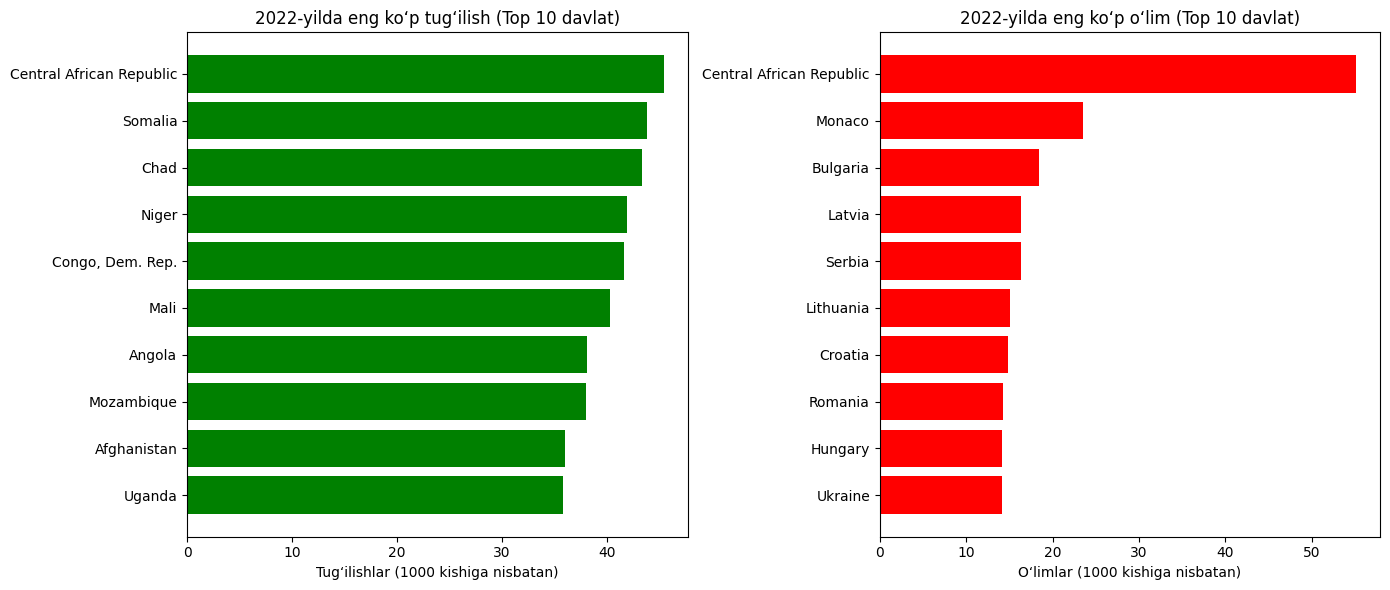

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. Ma'lumotlarni olish
# -------------------------

# Tug‘ilishlar soni (Crude Birth Rate, per 1000 people)
url_births = "https://api.worldbank.org/v2/country/all/indicator/SP.DYN.CBRT.IN?format=json&per_page=20000"
r_births = requests.get(url_births).json()[1]
data_births = pd.DataFrame(r_births)[["country", "countryiso3code", "date", "value"]]
data_births["country"] = data_births["country"].apply(lambda x: x["value"])
data_births = data_births.rename(columns={"value": "Birth rate"})
data_births = data_births[data_births["date"] == "2022"]

# O‘limlar soni (Crude Death Rate, per 1000 people)
url_deaths = "https://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json&per_page=20000"
r_deaths = requests.get(url_deaths).json()[1]
data_deaths = pd.DataFrame(r_deaths)[["country", "countryiso3code", "date", "value"]]
data_deaths["country"] = data_deaths["country"].apply(lambda x: x["value"])
data_deaths = data_deaths.rename(columns={"value": "Death rate"})
data_deaths = data_deaths[data_deaths["date"] == "2022"]

# -------------------------
# 2. Top 10 davlatlarni aniqlash
# -------------------------
top_10_births = data_births.sort_values("Birth rate", ascending=False).head(10)
top_10_deaths = data_deaths.sort_values("Death rate", ascending=False).head(10)

# -------------------------
# 3. Grafik chizish
# -------------------------
plt.figure(figsize=(14,6))

# Grafik 1 - Tug‘ilishlar
plt.subplot(1, 2, 1)
plt.barh(top_10_births["country"], top_10_births["Birth rate"], color="green")
plt.gca().invert_yaxis()  # yuqoridan pastga tartiblash
plt.title("2022-yilda eng ko‘p tug‘ilish (Top 10 davlat)")
plt.xlabel("Tug‘ilishlar (1000 kishiga nisbatan)")

# Grafik 2 - O‘limlar
plt.subplot(1, 2, 2)
plt.barh(top_10_deaths["country"], top_10_deaths["Death rate"], color="red")
plt.gca().invert_yaxis()
plt.title("2022-yilda eng ko‘p o‘lim (Top 10 davlat)")
plt.xlabel("O‘limlar (1000 kishiga nisbatan)")

plt.tight_layout()
plt.show()


10-bosqich: Demografik xususiyatlar

Tug‘ilish darajasi Afrika va Osiyoda yuqori.

Yevropada aholi qarishi va tabiiy o‘sishning sekinlashishi kuzatilmoqda.

2050 yilgacha eng tez o‘sish Afrikada bo‘lishi prognoz qilinmoqda.

11-bosqich: Demografik prognozlar

11-bosqich: Demografik prognozlar

2050 yilgacha dunyo aholisi ~9.7 mlrd ga yetishi kutilmoqda.

2100 yilga kelib ~10.4 mlrd atrofida barqarorlashadi.

Afrika 21-asr oxiriga borib aholisi jihatidan Osiyoga yaqinlashadi.

12-bosqich: Natijalar

Jahon aholisi 1950-yildan beri uch baravarga oshdi.

Asosiy demografik o‘sish Afrika va Osiyoda.

Yevropa va boshqa rivojlangan hududlarda qarish jarayoni kuchaymoqda.

13-bosqich: Umumiy xulosa

Jahon aholisi tezkor o‘sishda davom etmoqda, ammo 21-asr o‘rtalariga borib o‘sish sur’ati sekinlashishi kutiladi. Eng katta o‘sish Afrikada kuzatiladi, Osiyo esa eng yirik demografik markaz bo‘lib qoladi. Rivojlangan mamlakatlarda esa qarish jarayoni iqtisodiy va ijtimoiy siyosatga jiddiy ta’sir ko‘rsatadi. Shuning uchun global miqyosda demografik o‘zgarishlarga moslashish, migratsiya oqimlarini boshqarish va resurslardan samarali foydalanish kelajakda muhim ahamiyat kasb etadi.